In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genotypic-wheat-data/Genotypic_Data.csv
/kaggle/input/phenotypic-wheat-data/Phenotypic_Data.csv


In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
gt =  pd.read_csv('/kaggle/input/genotypic-wheat-data/Genotypic_Data.csv')
pt=pd.read_csv('/kaggle/input/phenotypic-wheat-data/Phenotypic_Data.csv')

# Display the sample data of 3 to 5 records

pt.size
gt.size
pt.head()
gt.head()

gt.info()
pt.info()
gt.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14790 entries, 0 to 14789
Columns: 291 entries, SNPs to WH1142
dtypes: float64(5), int64(1), object(285)
memory usage: 32.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Genotype             280 non-null    object 
 1   DH_Dharwad           280 non-null    float64
 2   DH_IARI-DELHI        280 non-null    float64
 3   DH_IARI-Jharkhand    280 non-null    float64
 4   DH_KARNAL            280 non-null    float64
 5   DH_Pooled            280 non-null    float64
 6   GFD_Dharwad          280 non-null    float64
 7   GFD_IARI-Delhi       280 non-null    float64
 8   GFD_IARI-Jharkhand   280 non-null    float64
 9   GFD_Karnal           280 non-null    float64
 10  GFD_Pooled           280 non-null    float64
 11  GNPS_Dharwad         280 non-null    float64
 12  GNPS_IARI-Jh

SNPs          0
alleles       0
Chrom         0
Pos           0
strand        0
           ... 
DBW173      379
DBW187      256
MACS6222    265
WH1124      206
WH1142      283
Length: 291, dtype: int64

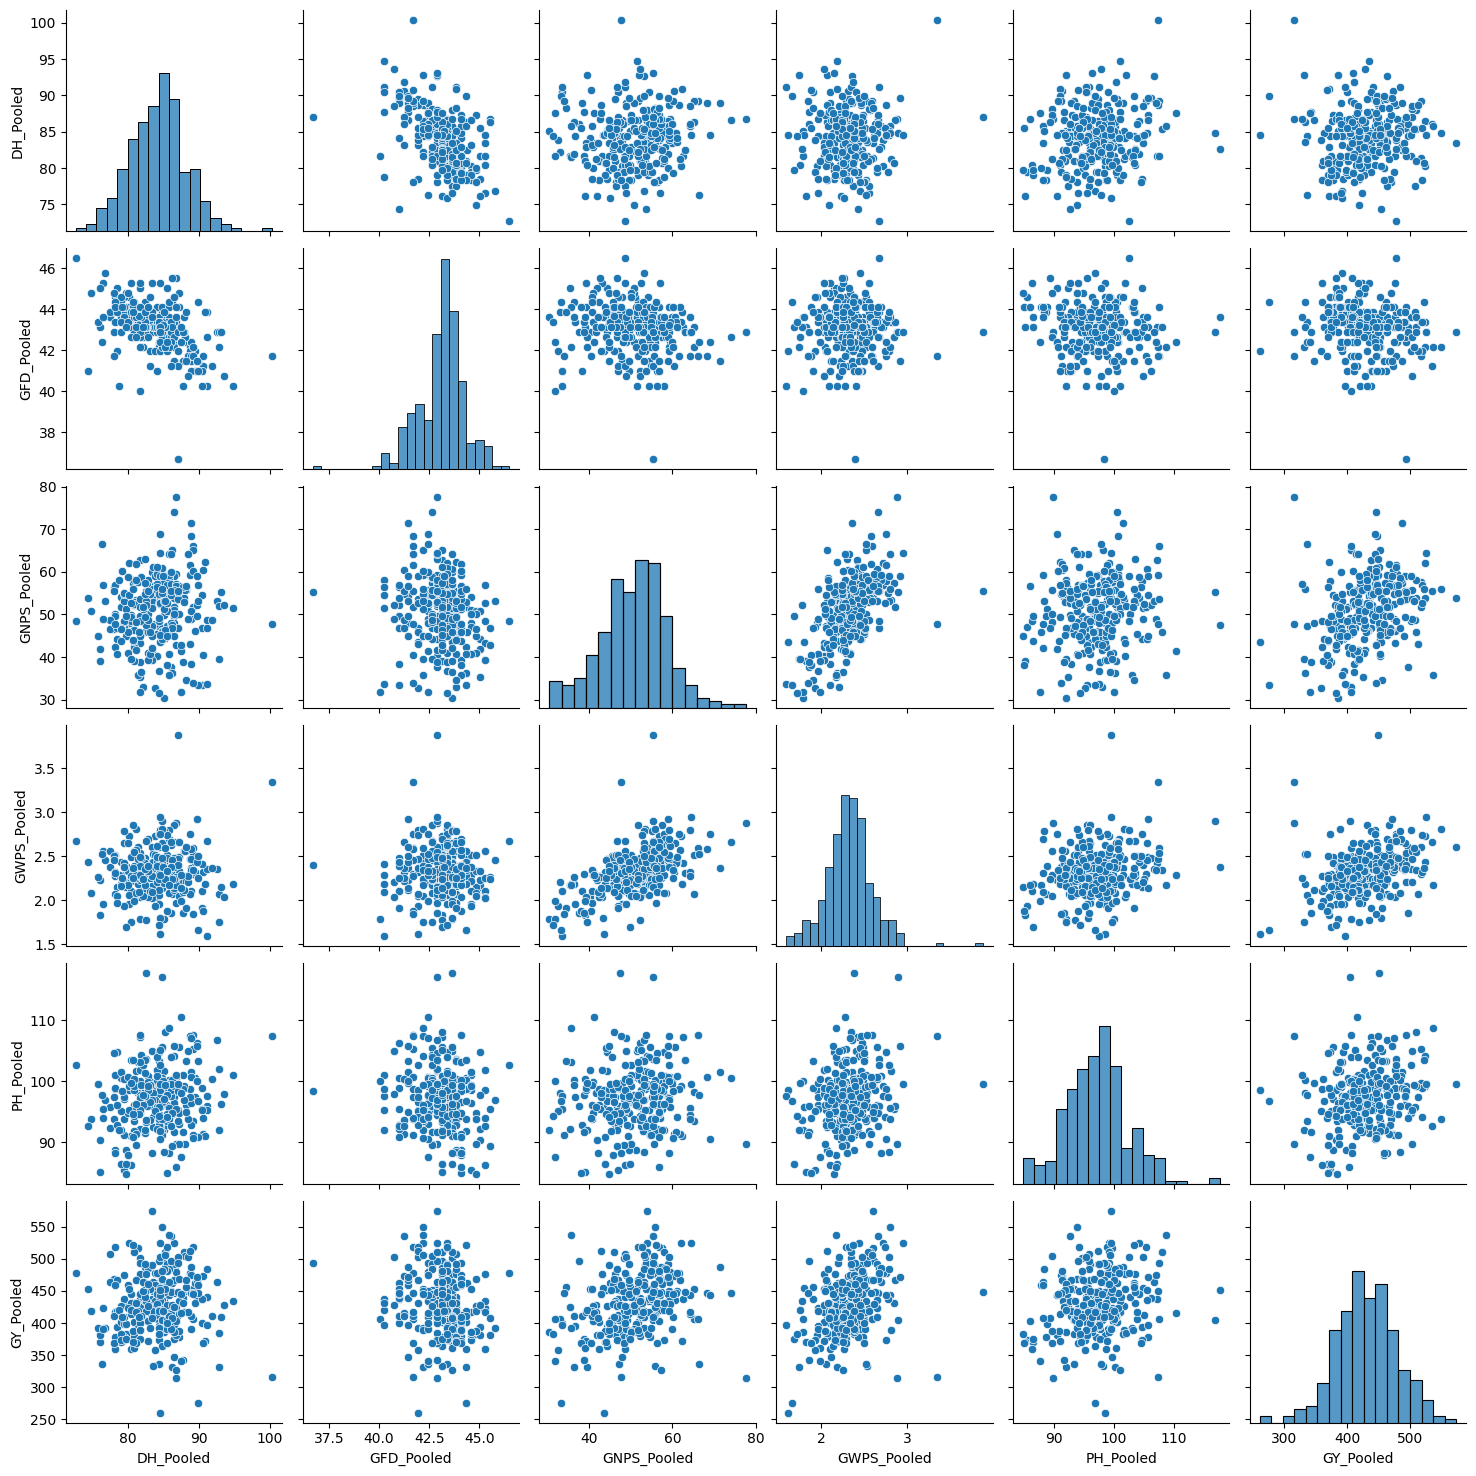

In [6]:
# selecting the columns we are intrested in
columns_intrested=['DH_Pooled', 'GFD_Pooled', 'GNPS_Pooled', 'GWPS_Pooled', 'PH_Pooled', 'GY_Pooled']
# creating a dataframe consisting only selected columns
select_cold=pt[columns_intrested]
# exploring non-linear relationships
import seaborn as sns
sns.pairplot(select_cold)  # Assuming df is your dataframe
plt.show()

In [7]:
# Removing the useless or no related cols from the dataset
col=pt['Genotype']
cols_to_drop=['Chrom','Pos','strand','assembly','center','protLSID','assayLSID','panel','QCcode']
gt=gt.drop(cols_to_drop,axis=1)
gt.to_csv('updated_genotype',index=False)

In [8]:
# Display the sample data of 3 to 5 records
gt.head()

,SNPs,alleles,AAI-W29,AKAW5080,AKAW5099,BRW3877,CG1029,CG1034,CG1035,CG1036,...,HD3372,HI1655,AKAW5088,MACS6753,DBW330,DBW173,DBW187,MACS6222,WH1124,WH1142
0,AX-94381285,C/T,CC,CC,CC,CC,NaN,TC,CC,CC,...,CC,NaN,CC,CC,TC,CC,CC,TC,CC,TC
1,AX-94383718,A/G,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,AA,AA,AA,AG,AA,AA,AG,AA,AG
2,AX-94384181,A/G,NaN,NaN,AA,AG,GG,AA,NaN,GG,...,AA,GG,AA,AA,GG,GG,AA,AA,GG,GG
3,AX-94384966,T/C,TT,CC,TT,TC,TT,TT,TT,CC,...,TT,TT,CC,TT,CC,TT,TT,TT,TT,CC
4,AX-94386458,C/A,AA,AC,CC,CC,AC,AA,AA,NaN,...,AA,CC,CC,CC,CC,CC,CC,CC,CC,CC


In [9]:
# Find Null values / Missing Data
df = pd.read_csv("updated_genotype")
df.isnull().sum()

SNPs           0
alleles        0
AAI-W29     1155
AKAW5080     624
AKAW5099     616
            ... 
DBW173       379
DBW187       256
MACS6222     265
WH1124       206
WH1142       283
Length: 282, dtype: int64

In [10]:
# Replacing the null values for given dataset with primary allele

import pandas as pd

def replace_nan_with_first_letter(value, alleles):
    if pd.isna(value):
        letter_before_slash = alleles.split('/')[0]
        return letter_before_slash * 2
    else:
        return value

for column in df.columns[1:]:
    df[column] = df.apply(lambda row: replace_nan_with_first_letter(row[column], row['alleles']), axis=1)

df=df.drop(['alleles'],axis=1)
df.to_csv("final_genotype",index=False)

KeyboardInterrupt: 

In [9]:
# Removing the other cols from phenotype dataset as we consider only pooled values

dropme=[]
for i in pt.columns:
    if i=='DH_Pooled' or i=='GFD_Pooled' or i=='GNPS_Pooled' or i=='GWPS_Pooled' or i=='PH_Pooled' or i=='GY_Pooled':
        continue
    else:
        dropme.append(i)
dropme=dropme[1:]

pt=pt.drop(dropme,axis=1)
pt.to_csv("final_phenotype",index=False)

In [10]:
# Label Encoding and replacing the encoded values

geno_map={'AA':1,'AT':2,'AG':3,'AC':4,'TT':5,'TG':6,'TC':7,'GG':8,'CG':9,'CC':10}
sample_geno=pd.read_csv("final_genotype")
df2=pd.DataFrame(sample_geno)

for i in df2[1:]:
    df2[i]=df2[i].map(geno_map)

df2['SNPs']=df['SNPs']
df2.head()
df2.to_csv("fgenotype",index=False)

In [11]:
# Merging both the dataset based on genotype  

import pandas as pd

fg=pd.read_csv("fgenotype")
fp=pd.read_csv("final_phenotype")

fg = fg.set_index('SNPs').T.reset_index()

fg.columns.name = None
fg = fg.rename(columns={'index': 'Genotype'})

merged_dataset = pd.merge(fg, fp, on='Genotype')

merged_dataset.to_csv("mergeds",index=False)

In [12]:
p=[]
f=[]
import pandas as pd
poled=[ 'DH_Pooled','GFD_Pooled' ,'GNPS_Pooled','GWPS_Pooled','PH_Pooled','GY_Pooled']

md=pd.read_csv("mergeds")

snp_data = md.iloc[:, 1:14790]

for i in poled:
    gfd_pooled = md[i]
    corr_gfd= snp_data.corrwith(gfd_pooled)
    snp_corr_df = pd.DataFrame({'SNP': snp_data.columns, 'Correlation': corr_gfd})
    snp_corr_df = snp_corr_df.sort_values(by='Correlation', ascending=False)

    k=[]

    for i ,j in  enumerate(snp_corr_df['Correlation']):
        if(j>0):
            k.append(snp_corr_df['SNP'].iloc[i])
    k = k[0:len(k)*4//5]
    p.append(k)

for i in p:
    print(len(i))
f = p
list1 = f[0]
list2 = f[1]
list3 = f[2]
list4 = f[3]
list5 = f[4]
list6 = f[5]

set1 = set(list1)
set2 = set(list2)
set3 = set(list3)
set4 = set(list4)
set5 = set(list5)
set6 = set(list6)

# Find the common elements
common_elements = set1.intersection(set2,set3,set4,set5,set6)
#common_elements = set(common_elements).intersection(set3)

# Convert the result back to a list (if needed)
common_elements_list = list(common_elements)
print(len(common_elements_list))
print(common_elements_list)

5878
6084
5863
5925
6052
5869
24
['AX-94475556', 'AX-94480569', 'AX-94477591', 'AX-95071247', 'AX-94440104', 'AX-94572618', 'AX-94944591', 'AX-94462858', 'AX-94670667', 'AX-94981573', 'AX-94534637', 'AX-94978875', 'AX-94776946', 'AX-94541833', 'AX-94524677', 'AX-94998259', 'AX-94702181', 'AX-94823460', 'AX-94663690', 'AX-94710748', 'AX-95224988', 'AX-94547219', 'AX-94646188', 'AX-94628115']


In [13]:
# Removing the non related snps from the dataset
dp=[]
for i in sorted(md.columns[1:]):
    if i not in common_elements_list:
        dp.append(i)

poled=[ 'DH_Pooled','GFD_Pooled' ,'GNPS_Pooled','GWPS_Pooled','PH_Pooled','GY_Pooled']
for i in poled:
    dp.remove(i)

In [14]:
# Reading the Final dataset

md1=pd.read_csv("mergeds")
md1=md1.drop(columns=dp)
md1.to_csv("pheno_geno.csv",index=False)
len(md1['Genotype'])

280

In [15]:
# Linear Regression Model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
# Assuming df contains your data
df = md1

# X should be the genetic sequences
# y should be the trait values (DH_Pooled, GFD_Pooled, GNPS_Pooled, GWPS_Pooled, PH_Pooled, GY_Pooled)
X = df.iloc[:, 1:25]  # Assuming the DNA sequences start from the second column

# Extract the trait values
y = df[['DH_Pooled', 'GFD_Pooled', 'GNPS_Pooled', 'GWPS_Pooled', 'PH_Pooled', 'GY_Pooled']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize input features and trait values separately (using the same scalers)
scaler_X = MinMaxScaler()

# Fit the scaler with feature names on the training data
X_train_scaled = scaler_X.fit_transform(X_train)

# Use the fitted scaler to transform the test data with feature names
X_test_scaled = scaler_X.transform(X_test)

# Build and train a Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = linear_regression_model.predict(X_test_scaled)

# Calculate Mean Squared Error
mae = mean_squared_error(y_test, y_pred)

# Generate and predict a new sequence
new_sequence_1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 4]).reshape(1, -1)
scaled_new_sequence = scaler_X.transform(new_sequence_1)
predictions = linear_regression_model.predict(scaled_new_sequence)

print("Root Mean Squared Error (RMSE):", np.sqrt(mae))
print("Predictions:", predictions)

Root Mean Squared Error (RMSE): 20.72428232993274
Predictions: [[ 77.91251614  46.70365775  43.5875465    1.75629992  94.24706631
  337.75956351]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [16]:
# Polynomial Regression Model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
# Assuming df contains your data
df = md1

# X should be the genetic sequences
# y should be the trait values (DH_Pooled, GFD_Pooled, GNPS_Pooled, GWPS_Pooled, PH_Pooled, GY_Pooled)
X = df.iloc[:, 1:25]  # Assuming the DNA sequences start from the second column

# Extract the trait values
y = df[['DH_Pooled', 'GFD_Pooled', 'GNPS_Pooled', 'GWPS_Pooled', 'PH_Pooled', 'GY_Pooled']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize input features and trait values separately (using the same scalers)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Create polynomial features
degree = 7  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Build and train a Polynomial Regression model
poly_regression_model = LinearRegression()
poly_regression_model.fit(X_train_poly, y_train_scaled)

# Predict on the test set
y_pred_scaled = poly_regression_model.predict(X_test_poly)

# Calculate Mean Squared Error
mae = mean_squared_error(y_test_scaled, y_pred_scaled)

# Generate and predict a new sequence
new_sequence_1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 4]).reshape(1, -1)
scaled_new_sequence = scaler_X.transform(new_sequence_1)
poly_new_sequence = poly.transform(scaled_new_sequence)
predictions_scaled = poly_regression_model.predict(poly_new_sequence)

# Inverse transform the scaled predictions to get the original scale
predictions = scaler_y.inverse_transform(predictions_scaled)

print("Root Mean Squared Error (RMSE):", np.sqrt(mae))
print("Predictions:", predictions)

# Inverse transform the scaled labels back to original scale
y_test = scaler_y.inverse_transform(y_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Calculate RMSE on original scale 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error Descaling (RMSE):", rmse)

Root Mean Squared Error (RMSE): 10457304929.97797
Predictions: [[-4.38934132e+14  5.41116655e+12  2.82165925e+14  1.18258939e+12
  -1.43340174e+14  2.19225580e+15]]
Root Mean Squared Error Descaling (RMSE): 1445532447222.3772


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [17]:
# Random Regression Model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

# Load your dataset
# Assuming df contains your data
df = md1

# X should be the genetic sequences
# y should be the trait values (DH_Pooled, GFD_Pooled, GNPS_Pooled, GWPS_Pooled, PH_Pooled, GY_Pooled)
X = df.iloc[:, 1:25]  # Assuming the DNA sequences start from the second column

# Extract the trait values
y = df[['DH_Pooled', 'GFD_Pooled', 'GNPS_Pooled', 'GWPS_Pooled', 'PH_Pooled', 'GY_Pooled']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize input features and trait values separately (using the same scalers)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Build and train a Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
random_forest_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = random_forest_model.predict(X_test_scaled)

# Calculate Mean Squared Error
mae = mean_squared_error(y_test_scaled, y_pred_scaled)

# Generate and predict a new sequence
new_sequence_1 = np.array([1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,1,2,3,4,4]).reshape(1, -1)  # Reshape to match input shape
scaled_new_sequence = scaler_X.transform(new_sequence_1)
predictions_scaled = random_forest_model.predict(scaled_new_sequence)

# Inverse transform the scaled predictions to get the original scale
predictions = scaler_y.inverse_transform(predictions_scaled)


print("Root Mean Squared Error (RMSE):", np.sqrt(mae))
print("Predictions:", predictions)

Root Mean Squared Error (RMSE): 0.15439166608047958
Predictions: [[ 84.16381667  43.01147667  48.46255667   2.25056667  96.10787
  429.26648333]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [18]:
# ANN
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset
# Assuming df contains your data
df = md1

# X should be the genetic sequences
# y should be the trait values (DH_Pooled, GFD_Pooled, GNPS_Pooled, GWPS_Pooled, PH_Pooled, GY_Pooled)
X = df.iloc[:, 1:25]  # Assuming the DNA sequences start from the second column

# Extract the trait values
y = df[['DH_Pooled', 'GFD_Pooled', 'GNPS_Pooled', 'GWPS_Pooled', 'PH_Pooled', 'GY_Pooled']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize input features and trait values separately (using the same scalers)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit the scaler with feature names on the training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

# Use the fitted scaler to transform the test data with feature names
X_test_scaled = scaler_X.transform(X_test)

# Build and train an ANN model with 7 hidden layers
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train_scaled.shape[1]))

# Adding 7 hidden layers
for _ in range(7):
    model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=6, activation='linear'))  # Assuming 6 output neurons for the 6 traits

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the scaled predictions to get the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Calculate Mean Squared Error
mae = mean_squared_error(y_test, y_pred)

# Print MSE and RMSE
print("Mean Squared Error (MSE):", mae)
print("Root Mean Squared Error (RMSE):", np.sqrt(mae))

# Predictions 
# Generate and predict a new sequence for the ANN model
new_sequence_1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 4]).reshape(1, -1)
scaled_new_sequence = scaler_X.transform(new_sequence_1)
predictions_new_sequence_scaled = model.predict(scaled_new_sequence)

# Inverse transform the scaled predictions to get the original scale
predictions_new_sequence = scaler_y.inverse_transform(predictions_new_sequence_scaled)

# Print predictions for the new sequence
print("Predictions for the new sequence:")
print(pd.DataFrame(predictions_new_sequence, columns=y.columns))

Epoch 1/50
7/7 [==============================] - 2s 7ms/step - loss: 0.1596
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0613
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0358
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0241
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0229
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0222
Epoch 9/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0223
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 11/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0216
Epoch 12/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0213
Epoch 13/50
7/7 [==============================] - 0s 3ms/step - loss: 0.

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [19]:
#   ANN
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset
# Assuming df contains your data
df = md1

# X should be the genetic sequences
# y should be the trait values (DH_Pooled, GFD_Pooled, GNPS_Pooled, GWPS_Pooled, PH_Pooled, GY_Pooled)
X = df.iloc[:, 1:25]  # Assuming the DNA sequences start from the second column

# Extract the trait values
y = df[['DH_Pooled', 'GFD_Pooled', 'GNPS_Pooled', 'GWPS_Pooled', 'PH_Pooled', 'GY_Pooled']]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize input features and trait values separately (using the same scalers)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Build an Artificial Neural Network (ANN) model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='linear'))  # Output layer with 6 neurons for each trait value

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

# Predict on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_scaled, y_pred_scaled)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Generate and predict a new sequence
new_sequence_1 = np.array([1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,1,2,3,4,4]).reshape(1, -1)  # Reshape to match input shape
scaled_new_sequence = scaler_X.transform(new_sequence_1)
predictions_scaled = model.predict(scaled_new_sequence)

# Inverse transform the scaled predictions to get the original scale
predictions = scaler_y.inverse_transform(predictions_scaled)

print("Root Mean Squared Error (RMSE):", rmse)
print("Predictions:", predictions)

Epoch 1/50
7/7 [==============================] - 1s 39ms/step - loss: 0.1826 - val_loss: 0.0957
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0748 - val_loss: 0.0510
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0477 - val_loss: 0.0378
Epoch 4/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0403 - val_loss: 0.0318
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0357 - val_loss: 0.0290
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0330 - val_loss: 0.0277
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0305 - val_loss: 0.0267
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0290 - val_loss: 0.0259
Epoch 9/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0278 - val_loss: 0.0250
Epoch 10/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0268 - val_loss: 0.0240
Epoch 11/50
7/7 [====================

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
